In [7]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings

In [8]:
dataset=pd.read_csv("Sentiment Analysis Dataset.csv",encoding='latin-1')

In [9]:
dataset.head()

,ItemID,Sentiment,SentimentText
0,1,0,is so sad for my APL frie...
1,2,0,I missed the New Moon trail...
2,3,1,omg its already 7:30 :O
3,4,0,.. Omgaga. Im sooo im gunna CRy. I'...
4,5,0,i think mi bf is cheating on me!!! ...


In [10]:
dataset.info

<bound method DataFrame.info of           ItemID  Sentiment                                      SentimentText
0              1          0                       is so sad for my APL frie...
1              2          0                     I missed the New Moon trail...
2              3          1                            omg its already 7:30 :O
3              4          0            .. Omgaga. Im sooo  im gunna CRy. I'...
4              5          0           i think mi bf is cheating on me!!!   ...
...          ...        ...                                                ...
1048570  1048584          0  Missing my fiancee sooo badly!!!  I love you b...
1048571  1048585          0                                 missing my friend 
1048572  1048586          0  Missing my friend and my cousin. Two months pa...
1048573  1048587          0                               missing my friends! 
1048574  1048588          0                              Missing my friends!! 

[1048575 rows x 3 c

In [11]:
dataset[dataset['Sentiment'] == 0].head(10)

,ItemID,Sentiment,SentimentText
0,1,0,is so sad for my APL frie...
1,2,0,I missed the New Moon trail...
3,4,0,.. Omgaga. Im sooo im gunna CRy. I'...
4,5,0,i think mi bf is cheating on me!!! ...
5,6,0,or i just worry too much?
7,8,0,Sunny Again Work Tomorrow :-| ...
10,11,0,I must think about positive..
12,13,0,this weekend has sucked so far
13,14,0,jb isnt showing in australia any more!
14,15,0,ok thats it you win.


In [12]:
dataset[dataset['Sentiment'] == 1].head(10)

,ItemID,Sentiment,SentimentText
2,3,1,omg its already 7:30 :O
6,7,1,Juuuuuuuuuuuuuuuuussssst Chillin!!
8,9,1,handed in my uniform today . i miss you ...
9,10,1,hmmmm.... i wonder how she my number @-)
11,12,1,thanks to all the haters up in my face a...
17,18,1,Feeling strangely fine. Now I'm gonna go l...
22,23,1,You're the only one who can see this cause...
28,29,1,"goodbye exams, HELLO ALCOHOL TONIGHT"
38,39,1,uploading pictures on friendster
41,42,1,(: !!!!!! - so i wrote something last week. ...


<AxesSubplot:>

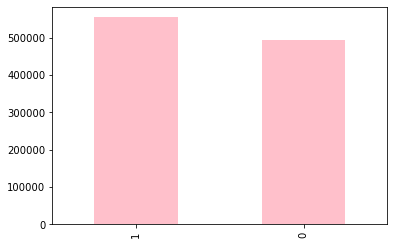

In [13]:
dataset['Sentiment'].value_counts().plot.bar(color = 'pink', figsize = (6, 4))

Text(0.5, 1.0, 'Most Frequently Occuring Words - Top 30')

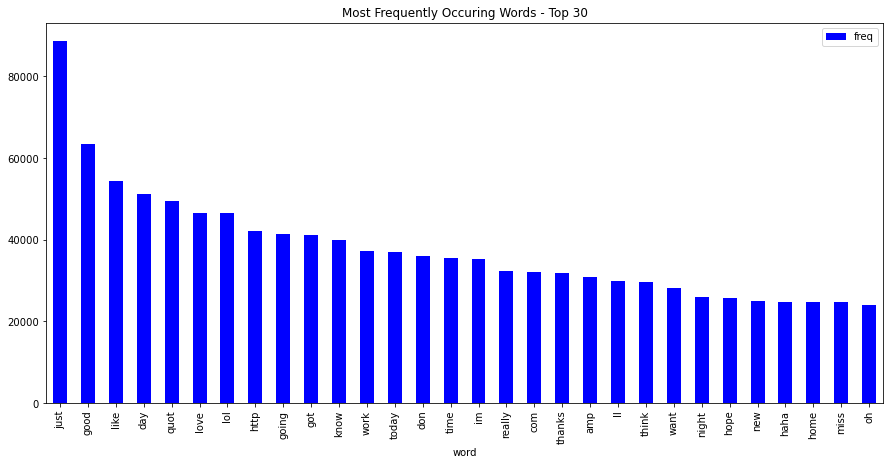

In [14]:
from sklearn.feature_extraction.text import CountVectorizer


cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(dataset.SentimentText)

sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

frequency.head(30).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = 'blue')
plt.title("Most Frequently Occuring Words - Top 30")

In [19]:
dataset['SentimentText']

0                               is so sad for my APL frie...
1                             I missed the New Moon trail...
2                                    omg its already 7:30 :O
3                    .. Omgaga. Im sooo  im gunna CRy. I'...
4                   i think mi bf is cheating on me!!!   ...
                                 ...                        
1048570    Missing my fiancee sooo badly!!!  I love you b...
1048571                                   missing my friend 
1048572    Missing my friend and my cousin. Two months pa...
1048573                                 missing my friends! 
1048574                                Missing my friends!! 
Name: SentimentText, Length: 1048575, dtype: object

In [64]:
import re
from nltk.stem.porter import PorterStemmer 
ps=PorterStemmer()
corpus=[]
tweets=dataset['SentimentText']
for i in tweets:
    tweet=re.sub('[^a-zA-Z]',' ',i)
    tweet=tweet.lower()
    words=tweet.split()
    stop_words=set(stopwords.words("english"))
    stop_words.discard("not")
    stem_word=[]
    for word in stop_words:
        x=ps.stem(word)
        stem_word.append(x)
    tweet=' '.join(stem_word)
    corpus.append(tweet)

KeyboardInterrupt: 

In [62]:
corpus

['is so sad for my apl friend',
 'i miss the new moon trailer',
 'omg it alreadi o',
 'omgaga im sooo im gunna cri i ve been at thi dentist sinc i wa supos just get a crown put on min',
 'i think mi bf is cheat on me t t',
 'or i just worri too much',
 'juuuuuuuuuuuuuuuuussssst chillin',
 'sunni again work tomorrow tv tonight',
 'hand in my uniform today i miss you alreadi',
 'hmmmm i wonder how she my number',
 'i must think about posit',
 'thank to all the hater up in my face all day',
 'thi weekend ha suck so far',
 'jb isnt show in australia ani more',
 'ok that it you win',
 'lt thi is the way i feel right now',
 'awhh man i m complet useless rt now funni all i can do is twitter http myloc me hx',
 'feel strang fine now i m gonna go listen to some semison to celebr',
 'huge roll of thunder just now so scari',
 'i just cut my beard off it s onli been grow for well over a year i m gonna start it over shaunamanu is happi in the meantim',
 'veri sad about iran',
 'wompppp wompp',
 'yo

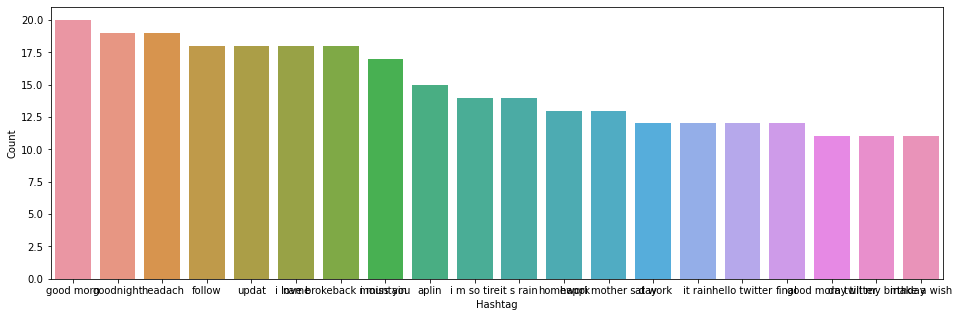

In [38]:
import nltk 
a = nltk.FreqDist(corpus)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# selecting top 20 most frequent hashtags     
d = d.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

In [53]:
df = pd.Series(corpus)

In [54]:
df

0                                is so sad for my apl friend
1                                i miss the new moon trailer
2                                           omg it alreadi o
3          omgaga im sooo im gunna cri i ve been at thi d...
4                           i think mi bf is cheat on me t t
                                 ...                        
1048570          miss my fiance sooo badli i love you baybay
1048571                                       miss my friend
1048572    miss my friend and my cousin two month pass by...
1048573                                       miss my friend
1048574                                       miss my friend
Length: 1048575, dtype: object

In [55]:
# tokenizing the words present in the training set
tokenized_tweet = df.apply(lambda x: x.split()) 
print(tokenized_tweet)
# importing gensim
import gensim

# creating a word to vector model
model_w2v = gensim.models.Word2Vec(
            tokenized_tweet,
            #size=200, # desired no. of features/independent variables 
            window=5, # context window size
            min_count=2,
            sg = 1, # 1 for skip-gram model
            hs = 0,
            negative = 10, # for negative sampling
            workers= 2, # no.of cores
            seed = 34)

model_w2v.train(tokenized_tweet, total_examples= len(df), epochs=20)

0                        [is, so, sad, for, my, apl, friend]
1                         [i, miss, the, new, moon, trailer]
2                                      [omg, it, alreadi, o]
3          [omgaga, im, sooo, im, gunna, cri, i, ve, been...
4                [i, think, mi, bf, is, cheat, on, me, t, t]
                                 ...                        
1048570    [miss, my, fiance, sooo, badli, i, love, you, ...
1048571                                   [miss, my, friend]
1048572    [miss, my, friend, and, my, cousin, two, month...
1048573                                   [miss, my, friend]
1048574                                   [miss, my, friend]
Length: 1048575, dtype: object


(222118994, 291713240)

In [57]:
model_w2v.wv.most_similar(positive = "dinner")

[('lunch', 0.8901126980781555),
 ('supper', 0.7937113046646118),
 ('giordano', 0.7888818979263306),
 ('breakfast', 0.7879011631011963),
 ('meal', 0.7741247415542603),
 ('brunch', 0.7668711543083191),
 ('pizza', 0.7606759667396545),
 ('sushi', 0.7500303387641907),
 ('bbq', 0.7489919066429138),
 ('merienda', 0.7470453381538391)]

In [58]:
model_w2v.wv.most_similar(negative = "hate")

[('djmaxgray', 0.21324637532234192),
 ('maxss', 0.21176069974899292),
 ('shatohin', 0.19793455302715302),
 ('thaipb', 0.19135725498199463),
 ('mrkot', 0.15121546387672424),
 ('sheller', 0.1429816335439682),
 ('hornedkavu', 0.11887466162443161),
 ('thaisroberta', 0.1177283376455307),
 ('dchest', 0.1157001182436943),
 ('freeatnet', 0.11335676908493042)]

In [59]:
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pande\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [70]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features = 2500)
x = cv.fit_transform(corpus).toarray()
y = dataset.iloc[:, 1]

print(x.shape)
print(y.shape)


(19973, 136)
(1048575,)


In [73]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y[0:19973], test_size=0.33, random_state=42)

from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
from sklearn.metrics import accuracy_score , f1_score, precision_score
print(accuracy_score(y_test,y_pred))
print(f1_score(y_test,y_pred))
print(precision_score(y_test,y_pred))

C:\Users\pande\anaconda3\lib\site-packages\sklearn\naive_bayes.py:455: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\pande\anaconda3\lib\site-packages\sklearn\naive_bayes.py:456: RuntimeWarning: invalid value encountered in true_divide
  n_ij -= 0.5 * np.sum(((X - self.theta_[i, :]) ** 2) /


0.5321601941747572
0.0
0.0


C:\Users\pande\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [82]:

model.predict(3)

ValueError: Expected 2D array, got scalar array instead:
array=3.
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.